In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle   

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';',index_col='id')

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [7]:
df['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [8]:
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9223,21220,1,250,86.0,140,100,3,1,0,0,1,1
30894,19054,2,207,78.0,100,70,1,1,0,1,1,0


In [9]:
# normlize the age in years
df['age'] = df['age']//365

In [10]:
# made BMI from height and weight
df['BMI'] = df['weight'] / (df['height'] * .01)**2

df.drop(columns=['height','weight'], inplace=True)

In [11]:
df['BMI'] = np.round(df['BMI'],2)

{'whiskers': [<matplotlib.lines.Line2D at 0x29b8d00a350>,
 'caps': [<matplotlib.lines.Line2D at 0x29b8d00a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b8d00a210>],
 'medians': [<matplotlib.lines.Line2D at 0x29b8d00a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b8d00a990>],
 'means': []}

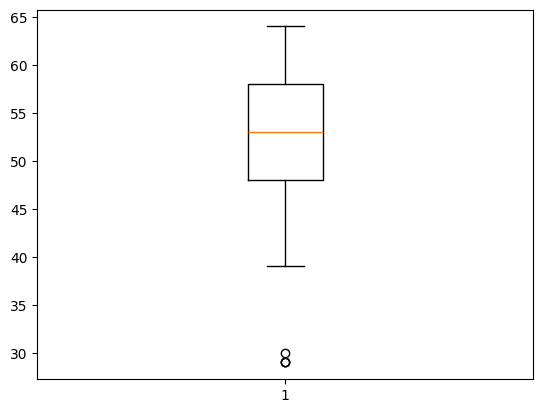

In [12]:
plt.boxplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

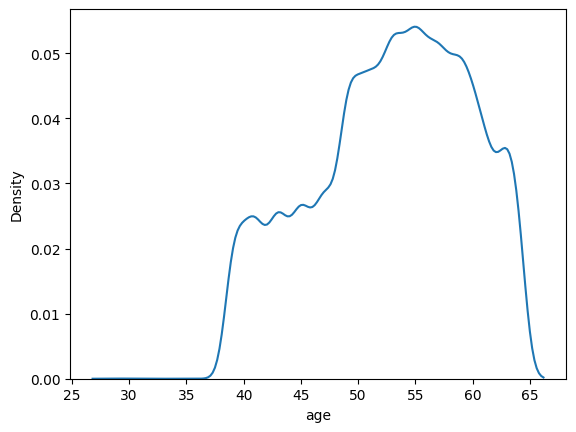

In [13]:
sns.kdeplot(df['age'])

In [14]:
df[df['age'] < 39]

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,
8850,29,1,120,80,1,1,0,0,1,0,19.27
31922,29,2,100,60,1,1,0,0,1,0,30.04
43842,29,1,120,80,1,1,0,0,1,0,23.34
79749,30,1,110,70,1,1,0,0,1,0,23.05


In [15]:
#handling outliers for age

df['age'] = np.where(df['age'] < 39,df['age'].mean(),df['age'])

In [16]:
#handling outliers for ap_hi

df = df[(df['ap_hi'] <= 200) & (df['ap_hi'] > 50)]

In [17]:
df[(df['ap_lo'] > 1000)]

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,
314,47.0,2,160,1100,1,2,1,0,1,1,29.26
680,41.0,1,150,1033,1,1,0,0,1,1,42.22
928,49.0,1,190,1100,1,1,0,0,1,1,20.69
1229,47.0,2,150,1100,1,1,1,0,0,1,29.07
1438,43.0,1,150,1001,2,1,0,0,1,1,25.46
...,...,...,...,...,...,...,...,...,...,...,...
96344,53.0,1,160,1200,3,1,0,0,0,1,35.88
97173,41.0,2,170,1100,1,1,0,0,1,1,35.88
97529,64.0,2,180,1100,1,1,0,0,1,1,32.41


<Axes: xlabel='ap_hi', ylabel='Density'>

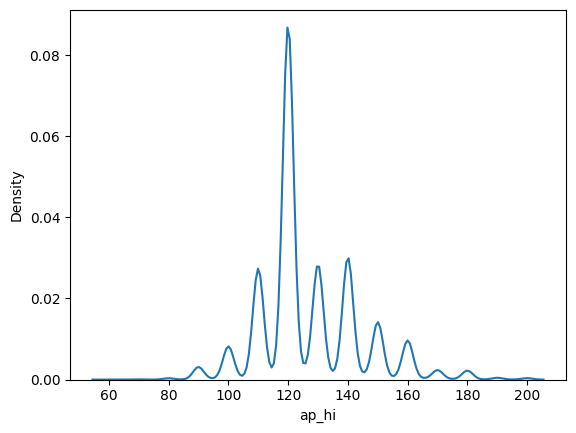

In [18]:
sns.kdeplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b8d2025d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b8d202850>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b8d202490>],
 'medians': [<matplotlib.lines.Line2D at 0x29b8d202ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b8d202c10>],
 'means': []}

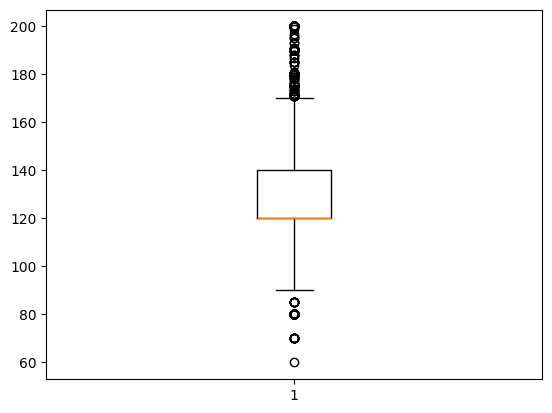

In [19]:
plt.boxplot(df['ap_hi'])

In [20]:
mask = df['ap_hi'] < df['ap_lo']
df.loc[mask, ['ap_hi', 'ap_lo']] = df.loc[mask, ['ap_lo', 'ap_hi']].values

In [21]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [22]:
# df[df['pulse_pressure'] <= 0] 

In [23]:
# def convert_num_to_cat_ap_hi(ap_hi):
#     #helthy
#     if ap_hi < 130 :return 1 
#     #warning
#     elif ap_hi >= 130 and ap_hi < 140 : return 2
#     #dedly
#     elif ap_hi >= 140 and ap_hi < 180 : return 3
#     #die
#     elif ap_hi >= 180 : return 4 

In [24]:
# df['ap_hi'] = df['ap_hi'].apply(convert_num_to_cat_ap_hi)

In [25]:
df = df[(df['ap_lo'] <= 130) & (df['ap_lo'] > 40)]

{'whiskers': [<matplotlib.lines.Line2D at 0x29b8d26afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b8d26b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b8d26ae90>],
 'medians': [<matplotlib.lines.Line2D at 0x29b8d26b4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b8d26b610>],
 'means': []}

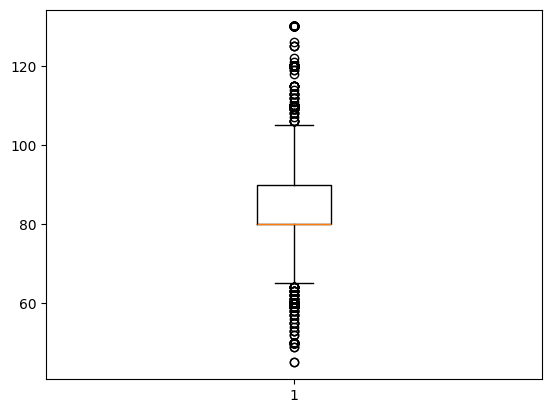

In [26]:
plt.boxplot(df['ap_lo'])

In [27]:
# def convert_num_to_cat_ap_lo(ap_lo):
#     #helthy
#     if ap_lo < 85 : return 1 
#     #warning
#     elif ap_lo >= 85 and ap_lo < 90 : return 2
#     #dedly
#     elif ap_lo >= 90 and ap_lo < 99 : return 3
#     #die
#     elif ap_lo >= 99 : return 4 

In [28]:
# df['ap_lo'] = df['ap_lo'].apply(convert_num_to_cat_ap_lo)

In [29]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure
id,,,,,,,,,,,,
0,50.0,2,110,80,1,1,0,0,1,0,21.97,30
1,55.0,1,140,90,3,1,0,0,1,1,34.93,50
2,51.0,1,130,70,3,1,0,0,0,1,23.51,60
3,48.0,2,150,100,1,1,0,0,1,1,28.71,50
4,47.0,1,100,60,1,1,0,0,0,0,23.01,40


In [ ]:
X = df.drop(columns=['cardio'])
y = df['cardio']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler =  MinMaxScaler()

In [34]:
# from sklearn.compose import ColumnTransformer
# transformer = ColumnTransformer(
#     transformers=[
#         ('age_scaler',MinMaxScaler(),['age','BMI','pulse_pressure','ap_hi','ap_lo']),
#     ],
#     remainder='passthrough'
# )

In [35]:
# X_train_trf = transformer.fit_transform(X_train)
# X_test_trf = transformer.transform(X_test)

In [36]:
# X_train_trf[0]

In [37]:
# X_train_trf[3],y_train[3]

In [38]:
X_train

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,pulse_pressure
id,,,,,,,,,,,
98312,43.0,1,102,66,1,1,0,0,1,20.83,36
94479,52.0,1,90,60,1,1,0,0,1,22.04,30
72375,53.0,1,120,80,1,1,0,0,1,22.04,40
35949,46.0,1,120,70,1,1,0,0,1,23.62,50
30887,49.0,2,140,90,1,1,0,0,1,22.86,50
...,...,...,...,...,...,...,...,...,...,...,...
54051,54.0,1,120,80,1,1,0,0,1,28.51,40
9084,41.0,1,120,80,1,1,0,0,1,25.40,40
79699,55.0,1,125,80,1,1,0,0,1,24.80,45


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.metrics import accuracy_score



# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': randint(100, 400),
#     'max_depth': [None, 5, 10,12, 18, 20, 25, 30, 35],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2']
# }

# grid = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grid,
#     n_iter=20,
#     cv=3,
#     n_jobs=-1,
#     verbose=1
# )

# grid.fit(X_train_trf, y_train)
# y_pred = grid.predict(X_test_trf)


# accuracy_score(y_pred,y_test)


In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# xgb = XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='logloss',
#     random_state=42,
#     n_jobs=-1
# )

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 5, 10,12, 18, 20, 25, 30, 35],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.7, 1.0],
#     'colsample_bytree': [0.7, 1.0]
# }

# grid = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=3,          
#     n_jobs=-1,
#     verbose=1
# )

# grid.fit(X_train_trf, y_train)
# y_pred = grid.predict(X_test_trf)

# accuracy_score(y_pred,y_test)

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# scaled_cols = ['age','BMI','pulse_pressure','ap_hi','ap_lo']
# num_cols = ['age','ap_hi','ap_lo','BMI','pulse_pressure']
# from sklearn.cluster import DBSCAN

# transformer = ColumnTransformer(
#     transformers=[
#         ('num_scaler', StandardScaler(), scaled_cols),
#         ('encoder', OneHotEncoder(), num_cols),

#     ],
#     remainder='passthrough'
# )


# X_scaled = transformer.fit_transform(X)

# lables = DBSCAN(eps=2.3, min_samples=50,).fit_predict(X_scaled)

# X['cluster'] = lables

# X

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,pulse_pressure,cluster
id,,,,,,,,,,,,
0,50.0,2,110,80,1,1,0,0,1,21.97,30,0
1,55.0,1,140,90,3,1,0,0,1,34.93,50,0
2,51.0,1,130,70,3,1,0,0,0,23.51,60,0
3,48.0,2,150,100,1,1,0,0,1,28.71,50,0
4,47.0,1,100,60,1,1,0,0,0,23.01,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.0,2,120,80,1,1,1,0,1,26.93,40,0
99995,61.0,1,140,90,2,2,0,0,1,50.47,50,0
99996,52.0,2,180,90,3,1,0,1,0,31.35,90,-1


In [42]:
X['cluster'].value_counts()

cluster
 0    62454
-1     6311
Name: count, dtype: int64

In [43]:
df[X['cluster'] == -1]

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure
id,,,,,,,,,,,,
32,63.0,1,145,85,2,2,0,0,1,1,36.05,60
33,64.0,2,110,60,1,1,0,0,1,0,18.49,50
36,39.0,1,130,100,2,1,0,0,1,0,27.77,30
40,57.0,2,130,70,1,3,0,0,0,0,25.91,60
59,54.0,1,170,80,3,1,0,0,1,1,21.08,90
...,...,...,...,...,...,...,...,...,...,...,...,...
99932,60.0,1,167,85,3,1,0,0,1,1,24.38,82
99948,45.0,1,110,75,1,1,0,0,1,0,19.29,35
99990,51.0,1,170,90,1,1,0,0,1,1,21.60,80


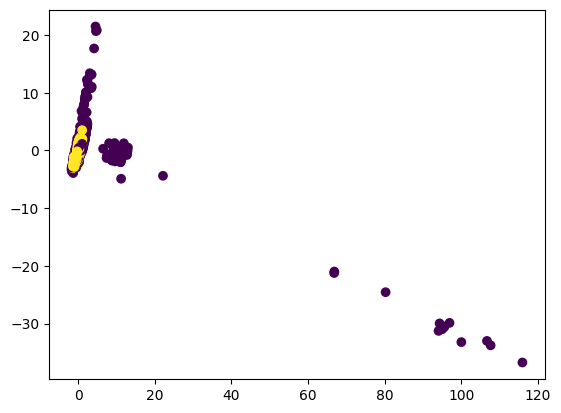

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)


plt.scatter(pca_data[:,0], pca_data[:,1], c=lables)
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

scaled_cols = ['age','BMI','pulse_pressure','ap_hi','ap_lo']
num_cols = ['age','ap_hi','ap_lo','BMI','pulse_pressure']


transformer = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), scaled_cols),
        ('encoder', OneHotEncoder(), num_cols),
    ],
    remainder='passthrough'
)

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 12, 18, 20, 25, 30, 35],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model', xgb)
])

grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, 12, 18, 20, 25, 30, 35],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__subsample': [0.7, 1.0],
        'model__colsample_bytree': [0.7, 1.0]
    },
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[8140, 2316],
       [3099, 7075]])

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(grid, f)